<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/robot_2bac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [63]:
def sind(x):
    return math.sin(math.radians(x))
 
def cosd(x):
    return math.cos(math.radians(x))

In [64]:
Px=[]
Py=[]
tt1=[] 
tt2=[]
for i in range(-120,120,1):
  for j in range(-45,45,1):
    Px.append(50*cosd(i) + 40*cosd(i+j))
    Py.append(50*sind(i) + 40*sind(i+j))
    tt1.append(math.radians(i))
    tt2.append(math.radians(j))


In [65]:
data = pd.DataFrame(np.c_[tt1,tt2,Px,Py],columns=['tt1','tt2','Px','Py'])

In [66]:
data

,tt1,tt2,Px,Py
0,-2.094395,-0.785398,-63.637033,-53.654032
1,-2.094395,-0.767945,-63.450468,-54.326764
2,-2.094395,-0.750492,-63.252190,-54.996138
3,-2.094395,-0.733038,-63.042261,-55.661950
4,-2.094395,-0.715585,-62.820743,-56.323996
...,...,...,...,...
21595,2.076942,0.698132,-61.583698,58.065703
21596,2.076942,0.715585,-61.828186,57.411791
21597,2.076942,0.733038,-62.061224,56.753712
21598,2.076942,0.750492,-62.282742,56.091665


In [67]:
y = data.drop(['Px','Py'],axis=1)
x = data.drop(['tt1','tt2'],axis=1)

In [68]:
print(x)
print(y)

              Px         Py
0     -63.637033 -53.654032
1     -63.450468 -54.326764
2     -63.252190 -54.996138
3     -63.042261 -55.661950
4     -62.820743 -56.323996
...          ...        ...
21595 -61.583698  58.065703
21596 -61.828186  57.411791
21597 -62.061224  56.753712
21598 -62.282742  56.091665
21599 -62.492671  55.425854

[21600 rows x 2 columns]
            tt1       tt2
0     -2.094395 -0.785398
1     -2.094395 -0.767945
2     -2.094395 -0.750492
3     -2.094395 -0.733038
4     -2.094395 -0.715585
...         ...       ...
21595  2.076942  0.698132
21596  2.076942  0.715585
21597  2.076942  0.733038
21598  2.076942  0.750492
21599  2.076942  0.767945

[21600 rows x 2 columns]


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17280, 2)
(17280, 2)
(4320, 2)
(4320, 2)


In [71]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode="min",restore_best_weights=True)
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               1536      
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 2)                 258       
                                                                 
Total params: 330,114
Trainable params: 330,114
Non-trainable params: 0
_________________________________________________________________


In [72]:
#compile
opt = Adam(learning_rate=0.0001) #toi uu toc do hoc
model.compile(optimizer=opt,loss='mse',metrics=['accuracy']) #mse,mae : sai số bình phương trung bình

In [78]:
history = model.fit(x_train,y_train,batch_size=18,epochs=100,verbose=1,validation_split=0.2,callbacks=[callback])

Epoch 1/100
768/768 [==============================] - 10s 13ms/step - loss: 0.1604 - accuracy: 0.8534 - val_loss: 0.1543 - val_accuracy: 0.8721
Epoch 2/100
768/768 [==============================] - 6s 8ms/step - loss: 0.1454 - accuracy: 0.8547 - val_loss: 0.1439 - val_accuracy: 0.8678
Epoch 3/100
768/768 [==============================] - 5s 7ms/step - loss: 0.1409 - accuracy: 0.8547 - val_loss: 0.1285 - val_accuracy: 0.8458
Epoch 4/100
768/768 [==============================] - 5s 6ms/step - loss: 0.1365 - accuracy: 0.8566 - val_loss: 0.1219 - val_accuracy: 0.8686
Epoch 5/100
768/768 [==============================] - 5s 7ms/step - loss: 0.1284 - accuracy: 0.8578 - val_loss: 0.1261 - val_accuracy: 0.8741
Epoch 6/100
768/768 [==============================] - 5s 7ms/step - loss: 0.1258 - accuracy: 0.8618 - val_loss: 0.1216 - val_accuracy: 0.8730
Epoch 7/100
768/768 [==============================] - 8s 11ms/step - loss: 0.1233 - accuracy: 0.8579 - val_loss: 0.1221 - val_accuracy: 0.8

In [79]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])


Sai số kiểm tra là:  0.11441700905561447
độ chính xác kiểm tra là:  0.8643518686294556


In [80]:
model.save('/content/drive/MyDrive/AI/robot2.h5')

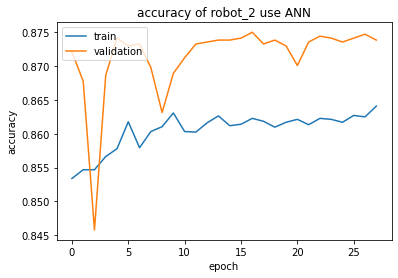

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of robot_2 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [82]:
ypr=model.predict(x_test)
data = pd.DataFrame(np.c_[y_test,ypr,x_test],columns=['tt1','tt2','tt1_pre','tt2_pre','Px','Py'])
data

,tt1,tt2,tt1_pre,tt2_pre,Px,Py
0,1.675516,0.279253,1.824140,0.129821,-20.210687,86.813449
1,1.169371,-0.087266,1.159918,-0.019578,38.315419,81.343146
2,0.890118,-0.436332,0.711037,-0.020801,67.417781,56.392144
3,-0.052360,0.366519,0.121157,-0.000632,87.973737,9.743882
4,-1.710423,-0.750492,-1.785888,-0.337099,-38.044494,-74.686219
...,...,...,...,...,...,...
4315,0.872665,-0.209440,0.806075,-0.013019,63.659811,62.928681
4316,-2.059489,-0.767945,-2.068014,-0.791759,-61.515839,-56.508059
4317,0.017453,0.506145,0.239088,-0.025277,84.633401,20.872620
4318,1.850049,-0.279253,1.741079,0.056405,-13.781868,88.063085
